<a href="https://colab.research.google.com/github/GreeshmaHarids/Greeshma_Meta_Scifor_Technology/blob/main/Machine_Learning/Revised_5_0_Deicsion_Tree_Regression_And_Cross_Validation_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Regressor Implementation

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
#importing daatset
data_df=pd.read_csv("/content/cardekho_data.csv")

In [41]:
data_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
#preprocessing

data_df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [43]:
data_df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


In [44]:
data_df.shape

(301, 9)

In [45]:
data_df.drop(columns=['Car_Name','Fuel_Type','Seller_Type','Transmission'],inplace=True)

In [46]:
data_df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [47]:

## Taking Sample Data
df=data_df.sample(frac=0.25)

In [48]:
df.shape

(75, 5)

In [50]:
#splitting into x and y

#independent features
X=df.drop(["Selling_Price"],axis=1)
#dependent features
y=df["Selling_Price"]

In [51]:
X.head()

,Year,Present_Price,Kms_Driven,Owner
169,2015,0.54,14000,0
159,2017,0.51,4000,0
131,2015,0.82,18000,0
256,2016,13.60,49562,0
63,2015,35.96,47000,0


In [52]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [53]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [54]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred=regressor.predict(X_test)

In [56]:
y_pred

array([23.  ,  6.25,  3.1 ,  0.45,  8.5 ,  0.48, 10.25,  0.6 , 23.  ,
        2.55,  8.5 ,  0.25,  5.5 ,  1.25,  0.5 ,  6.25,  5.11,  2.55,
        1.1 ,  3.25,  2.55,  1.95,  5.5 ,  0.5 ,  4.35])

In [57]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [58]:
score

0.9027816440513539

In [59]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()

In [60]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [61]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [62]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [63]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='log2',splitter='best')

In [64]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='log2')

In [65]:
%matplotlib inline

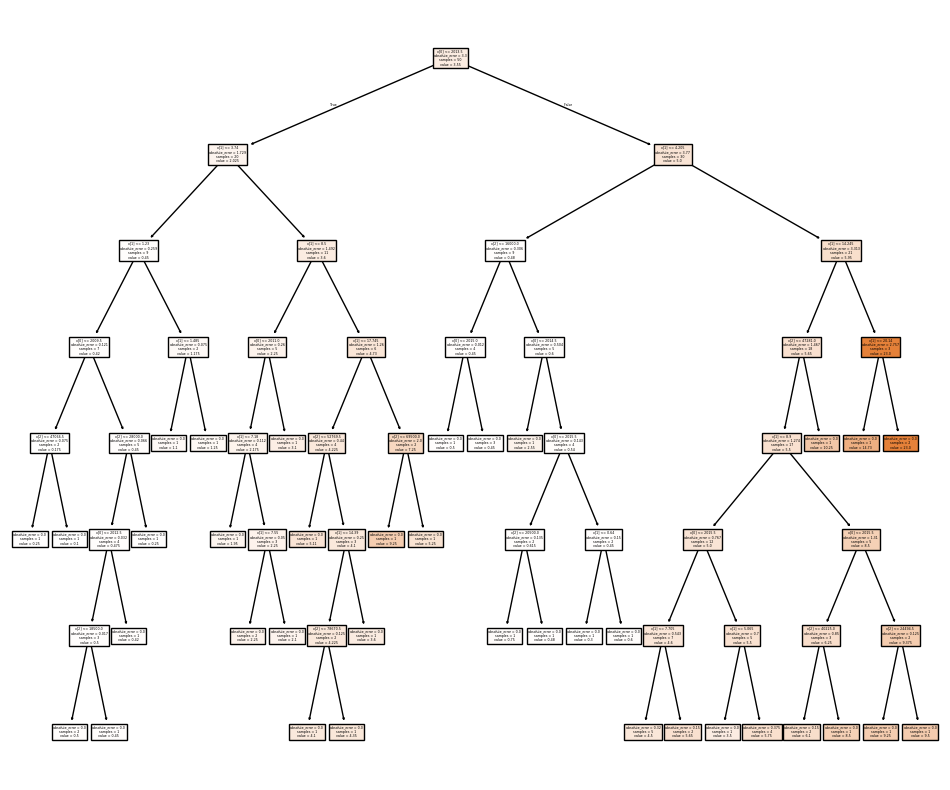

In [66]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [67]:
y_pred=regressorcv.predict(X_test)

In [68]:
r2_score(y_pred,y_test)

0.5917939099693454